In [30]:
import numpy as np
import itertools
import networkx as nx
import matplotlib.pyplot as plt

In [31]:
# Matrix T, technology sequences
# T = np.array([[1,2,3],
#               [1,3,2],
#               [2,1,3]])
# # Matrix P, processing time
# P = np.array([[3,3,3],
#               [2,3,4],
#               [3,2,1]])


dataset = np.load('./dataset/generatedData3_3_Seed200.npy')

P = dataset[0][0] # First data
T = dataset[0][1] # First data

In [32]:
ground_truth = np.load('/Users/vu/Desktop/RnD/ground_truth/generatedData3_3_Seed200.npy')

P_gt = ground_truth[0]

In [33]:
P,P_gt

(array([[27, 17, 69],
        [43, 56, 77],
        [80, 90, 15]]),
 array([[[  0.,   0.,  27.,  27.],
         [  1.,  27.,  43.,  70.],
         [  2., 170.,  15., 185.]],
 
        [[  0.,  27.,  17.,  44.],
         [  2.,  80.,  90., 170.],
         [  1., 170.,  77., 247.]],
 
        [[  2.,   0.,  80.,  80.],
         [  1., 114.,  56., 170.],
         [  0., 170.,  69., 239.]]]))

In [34]:
T,P

(array([[1, 2, 3],
        [1, 3, 2],
        [3, 2, 1]]),
 array([[27, 17, 69],
        [43, 56, 77],
        [80, 90, 15]]))

In [115]:
# add edge related to technology sequence ( order machine for job J)
# example: for job 2, we have order 1,3,2 ==> edge ('21', '23') - ('23', '22')
# 'O' refer to node "start", T refer to "ternimate"
edge = []
job_list = np.arange(1,T.shape[1]+1) #[1,2, 3]
machine_list = np.arange(1,T.shape[0]+1) # [1, 2, 3]
for i in job_list:
    for j in range(len(machine_list)-1):
        # print(i,j)
        edge.append((str(i) + str(T[i-1,j]), str(i) + str(T[i-1,j+1])))

    edge.append((str('O'), str(i) + str(T[i-1,0])))
    edge.append((str(i) + str(T[i-1,-1]), str('T')))
        
print(edge)


[('11', '12'), ('12', '13'), ('O', '11'), ('13', 'T'), ('21', '23'), ('23', '22'), ('O', '21'), ('22', 'T'), ('33', '32'), ('32', '31'), ('O', '33'), ('31', 'T')]


In [116]:
# add edge related to pair of jobs in same machine
for m in range(1,P_gt.shape[0] + 1): 
    # Get solution of each machine 
    ground_truth = P_gt[m-1]

    flow = []

    for job_data in ground_truth:
        # Job data has format:
        # [job_id, processing_time, start_time, end_time]
        flow.append(str(int(job_data[0]) + 1) + str(m)) # job_id is count from 1 to J
        
    # Concate sequence of nodes to get arcs of pair job-machine
    for i in range(len(nodes)-1):
        edge.append((str(flow[i]), str(flow[i+1])))

In [117]:
import networkx as nx

# Add edge value
G = nx.DiGraph()
for e in edge:
    G.add_edge(*e)

# Loop node in Graph
for n in G:
    if n != "O" and n != "T":
        # Add value for node
        G.nodes[n]['value'] = P[int(n[0])-1, int(n[1])-1]

G.add_edges_from(edge)

{'11': 27, '12': 17, '13': 69, '21': 43, '23': 77, '22': 56, '33': 15, '32': 90, '31': 80}


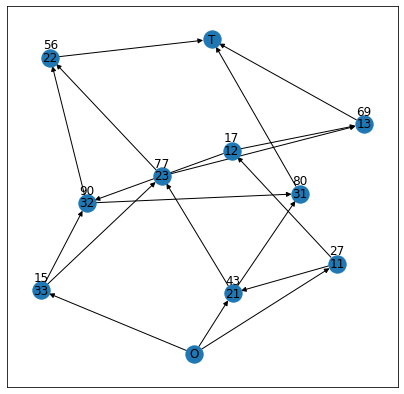

In [119]:
def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    pos=nx.spring_layout(G) 
    node_attrs = nx.get_node_attributes(G, 'value')
    print(node_attrs)
    pos_attrs = {}
    for node, coords in pos.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    labels = nx.get_edge_attributes(G,'weight')

    nx.draw_networkx(G, pos, with_labels=True,
                    arrows= True, cmap="Set2")

    # Draw edge value
    # nx.draw_networkx_edge_labels(G,pos,edge_labels=labels) 

    # Draw node value
    nx.draw_networkx_labels(G, pos_attrs, labels=node_attrs)

    # Draw value of node 
    plt.show()

color = None
visualize_graph(G, color)    